# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\user\AppData\Local\Temp\pip-install-m_xug_4j\tensorflow-gpu_fcdc12aa18c444ccac950f9285906397\setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
ERROR: Could not build

In [2]:
!pip list

Package                      Version
---------------------------- ------------
about-time                   4.2.1
absl-py                      2.1.0
aiofiles                     23.2.1
aiohttp                      3.8.5
aiosignal                    1.3.1
alive-progress               3.1.4
annotated-types              0.5.0
anyio                        3.7.1
asttokens                    2.4.0
astunparse                   1.6.3
async-timeout                4.0.3
attrs                        23.1.0
backcall                     0.2.0
backoff                      2.2.1
bcrypt                       4.0.1
beautifulsoup4               4.12.2
Brotli                       1.1.0
cachetools                   5.3.2
certifi                      2023.7.22
cffi                         1.15.1
charset-normalizer           3.2.0
chroma-hnswlib               0.7.3
chromadb                     0.4.13
ci-info                      0.3.0
click                        8.1.7
colorama                     0.4.6
co


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import tensorflow as tf
import os

In [10]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [11]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [3]:
import cv2
import imghdr

C:\Users\user\AppData\Local\Temp\ipykernel_13900\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [4]:
data_dir = 'data' 

In [5]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [6]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list data\ndmg_car\1200px-2019_Toyota_Corolla_Icon_Tech_VVT-i_Hybrid_1-8.jpg
Image not in ext list data\ndmg_car\2023-EQE350-SEDAN-AVP-DR.png
Image not in ext list data\ndmg_car\group-g-mercedes-c200.jpg
Image not in ext list data\ndmg_car\Mobile_1152_2048.jpg
Image not in ext list data\ndmg_car\TommyGun_Tesla_CyberTruck.jpg


# 3. Load Data

In [7]:
import numpy as np
from matplotlib import pyplot as plt

In [12]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 199 files belonging to 2 classes.


In [13]:
data_iterator = data.as_numpy_iterator()

In [15]:
batch = data_iterator.next()

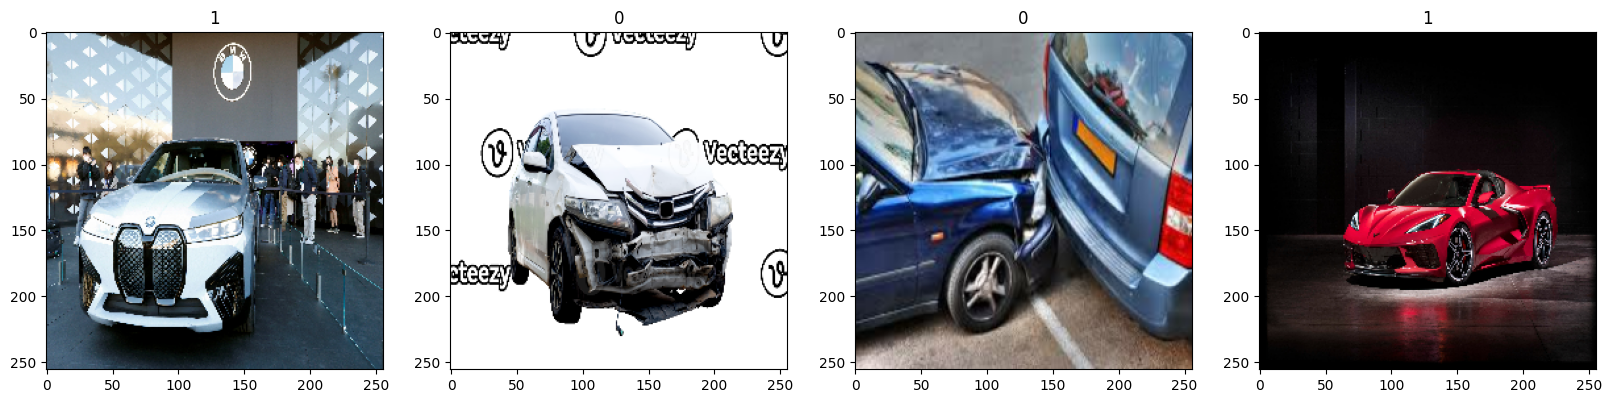

In [16]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [17]:
data = data.map(lambda x,y: (x/255, y))

In [18]:
data.as_numpy_iterator().next()

(array([[[[0.47455072, 0.54513896, 0.6235703 ],
          [0.4706184 , 0.54120666, 0.619638  ],
          [0.46262255, 0.5449755 , 0.6194853 ],
          ...,
          [0.5058824 , 0.5176471 , 0.5372549 ],
          [0.49051058, 0.5022753 , 0.52188313],
          [0.491041  , 0.5028057 , 0.52241355]],
 
         [[0.47480062, 0.54559565, 0.62340665],
          [0.4816308 , 0.55242586, 0.6302368 ],
          [0.4934654 , 0.5679752 , 0.6346419 ],
          ...,
          [0.49205083, 0.50340194, 0.52280295],
          [0.5171123 , 0.5284634 , 0.5478645 ],
          [0.5171174 , 0.5284685 , 0.5478695 ]],
 
         [[0.48874298, 0.56325275, 0.6299194 ],
          [0.49291512, 0.56742495, 0.6340916 ],
          [0.48639706, 0.55306375, 0.61580884],
          ...,
          [0.5408103 , 0.54473186, 0.5604181 ],
          [0.53803736, 0.5419589 , 0.5576452 ],
          [0.53333336, 0.5372549 , 0.5529412 ]],
 
         ...,
 
         [[0.3284718 , 0.35592282, 0.37945223],
          [0.32732

# 5. Split Data

In [19]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [20]:
train_size

4

In [21]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [22]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [24]:
model = Sequential()

In [25]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [26]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# 7. Train

In [28]:
logdir='logs'

In [29]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [30]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


4/4 [==============================] - 11s 2s/step - loss: 2.8169 - accuracy: 0.5312 - val_loss: 1.5191 - val_accuracy: 0.4688
Epoch 2/20
4/4 [==============================] - 6s 1s/step - loss: 1.1520 - accuracy: 0.3906 - val_loss: 0.7020 - val_accuracy: 0.3125
Epoch 3/20
4/4 [==============================] - 6s 1s/step - loss: 0.6892 - accuracy: 0.6172 - val_loss: 0.6812 - val_accuracy: 0.7500
Epoch 4/20
4/4 [==============================] - 6s 1s/step - loss: 0.6785 - accuracy: 0.5859 - val_loss: 0.6508 - val_accuracy: 0.6875
Epoch 5/20
4/4 [==============================] - 6s 1s/step - loss: 0.6328 - accuracy: 0.7578 - val_loss: 0.5813 - val_accuracy: 0.8125
Epoch 6/20
4/4 [==============================] - 6s 1s/step - loss: 0.5682 - accuracy: 0.7969 - val_loss: 0.4809 - val_accuracy: 0.7812
Epoch 7/20
4/4 [==============================] - 6s 1s/step - loss: 0.5447 - accuracy: 0.7422 - val_loss: 0.4940 - val_accuracy: 0.7812
Epoch 8/20
4/4 [======================

# 8. Plot Performance

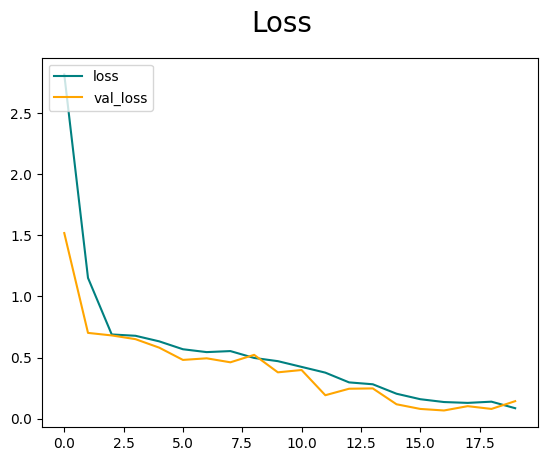

In [31]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

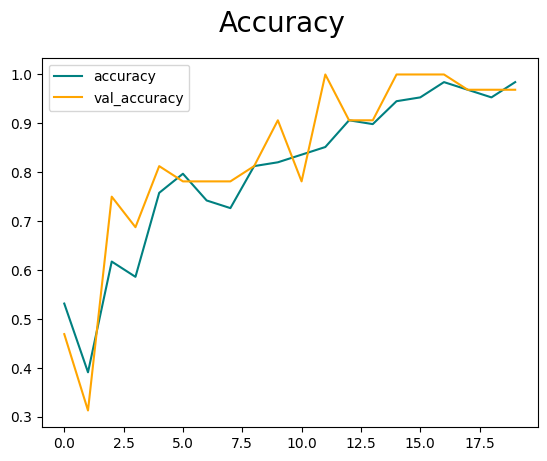

In [32]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [33]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [34]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [35]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [36]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


# 10. Test

In [53]:
import cv2

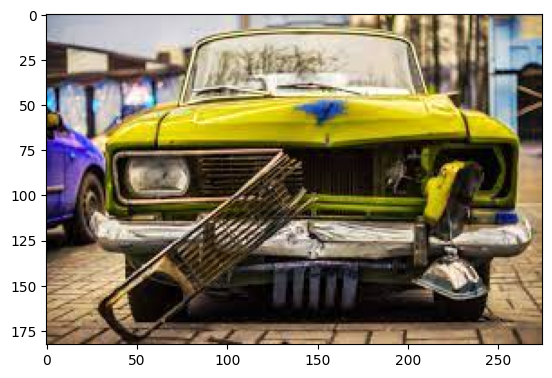

In [55]:
img = cv2.imread('damaged.jpg')
plt.imshow(img)
plt.show()

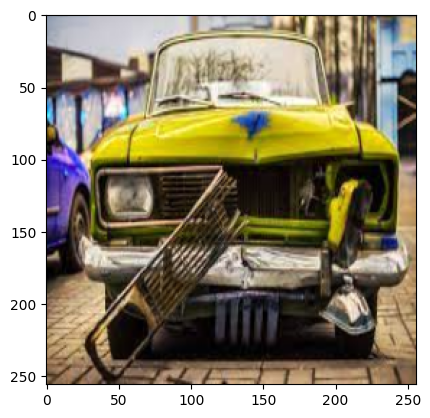

In [56]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [57]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 44ms/step


In [58]:
yhat

array([[0.02317203]], dtype=float32)

In [59]:
if yhat > 0.5: 
    print(f'Car is not damaged')
else:
    print(f'Car is damaged')

Car is damaged


# 11. Save the Model

In [60]:
from tensorflow.keras.models import load_model

In [61]:
model.save(os.path.join('models','imageclassifier.h5'))

c:\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [64]:
new_model = load_model('models/imageclassifier.h5')

In [65]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 256ms/step


array([[0.02317203]], dtype=float32)